In [1]:
# Import libraries and packages
import pandas as pd
import os
import sys

# Define path with .py codes containing functions used in this script
os.chdir( '../src/models')
sys.path.append('../features/')

# Import useful functions for this script  
from tracking import track
from fun_classifiers import split_data,train_decision_tree,train_random_forest,generate_confusion_heatmap

track("-"*25 + "DECISION TREE CLASSIFIER" + "-"*25)

# Reading data

#### Define path to data files

In [2]:
track("Defining path to data files")

# Define base path to data files
path = '../../temp_data/'

# Define path to the table that will be used in this project
path_clustered_data = path + 'model_data_with_clusters.csv'

# Ensure the input file exist
assert os.path.isfile(path_clustered_data), f'{path_clustered_data} not found. Is it a file?'

#### Read the files

In [3]:
# Read model_data table
track("Reading files")
clustered_data = pd.read_csv(path_clustered_data)
track("Finished reading files")

In [4]:
# Droping undesired columns
data = clustered_data.drop(["author", "quality_rating"],axis = 1)

First, we will split our clustered data into training and test partitions. In this case, 20% of the data is stored for testing whereas 80 % is used in the training procedure

In [5]:
X_train, X_test, Y_train, Y_test = split_data(data,0.2)

Then, a DTC with a maximum depth of 3 will be trained.

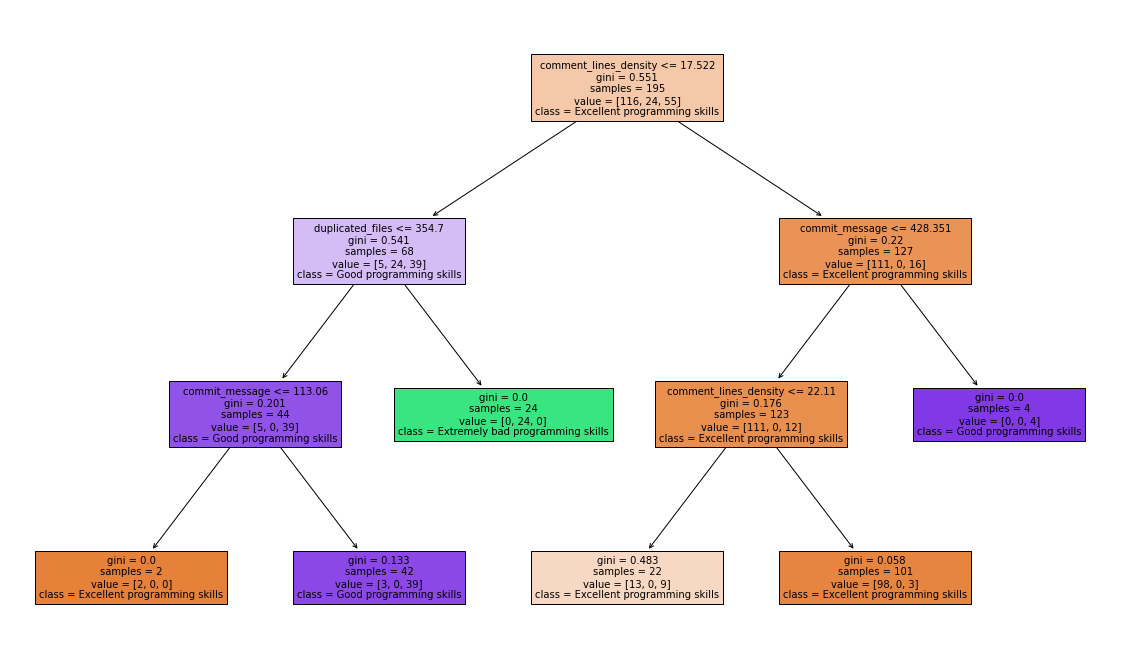

In [6]:
# Creating the decision tree classifier.
dtc = train_decision_tree([X_train,Y_train])

The same operation is executed but, in this case, an ensembling of 100 DTC is used for prediciton.

In [7]:
rf = train_random_forest([X_train,Y_train])

Lastly, the prediction for both models is obtained and their respective confusion matrix are calculated.

In [8]:
pred_dtc = dtc.predict(X_test)
pred_rf = rf.predict(X_test)

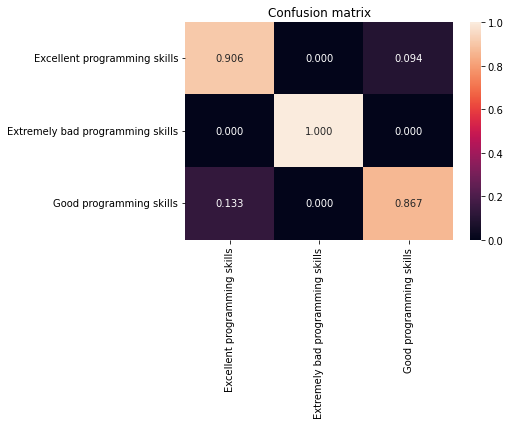

In [9]:
generate_confusion_heatmap(pred_dtc,Y_test,"DTC")

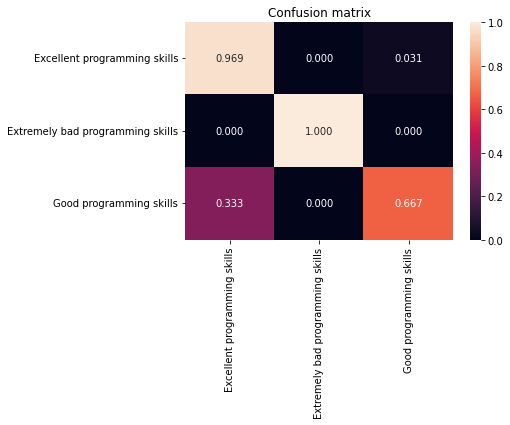

In [10]:
generate_confusion_heatmap(pred_rf,Y_test,"RF")